# Time Value of Money: Introduction to Compounding Frequency

## 1. Introduction to Compounding Frequency

Interest rates can be expressed with different compounding frequencies:
- Annual (once per year)
- Semi-annual (twice per year)
- Quarterly (four times per year)
- Monthly (twelve times per year)
- Daily (365 times per year)
- Continuous (infinitely many times per year)

The compounding frequency affects the effective interest earned over time.

### Mathematical Formulations

**Discrete compounding** with $n$ periods per year:
$$FV = PV \cdot \left(1 + \frac{r}{n}\right)^{n \cdot t}$$

**Continuous compounding**:
$$FV = PV \cdot e^{r \cdot t}$$

where $FV$ is future value, $PV$ is present value, $r$ is the annual rate, and $t$ is time in years.

In [9]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Parameters
principal = 1000.0  # Initial investment
r_annual = 0.05     # 5% annual rate
time = 1.0          # 1 year period

# Compare different compounding frequencies
frequencies = [1, 2, 4, 12, 365, 'continuous']
labels = ['Annual', 'Semi-annual', 'Quarterly', 'Monthly', 'Daily', 'Continuous']

print(f"\033[4m{100*r_annual:.2f}% interest rate at different compounding periods:\033[0m")

for i, n in enumerate(frequencies):
    if n == 'continuous':
        fv = principal * math.exp(r_annual * time)
    else:
        fv = principal * (1 + r_annual/n)**(n*time)
    print(f"{labels[i]} compounding: ${fv:.2f} (Annual yield: {(fv/principal-1)*100:.4f}%)")

5.00% interest rate at different compounding periods:
Annual compounding: $1050.00 (Annual yield: 5.0000%)
Semi-annual compounding: $1050.62 (Annual yield: 5.0625%)
Quarterly compounding: $1050.95 (Annual yield: 5.0945%)
Monthly compounding: $1051.16 (Annual yield: 5.1162%)
Daily compounding: $1051.27 (Annual yield: 5.1267%)
Continuous compounding: $1051.27 (Annual yield: 5.1271%)


### Visualizing the Effect of Compounding Frequency

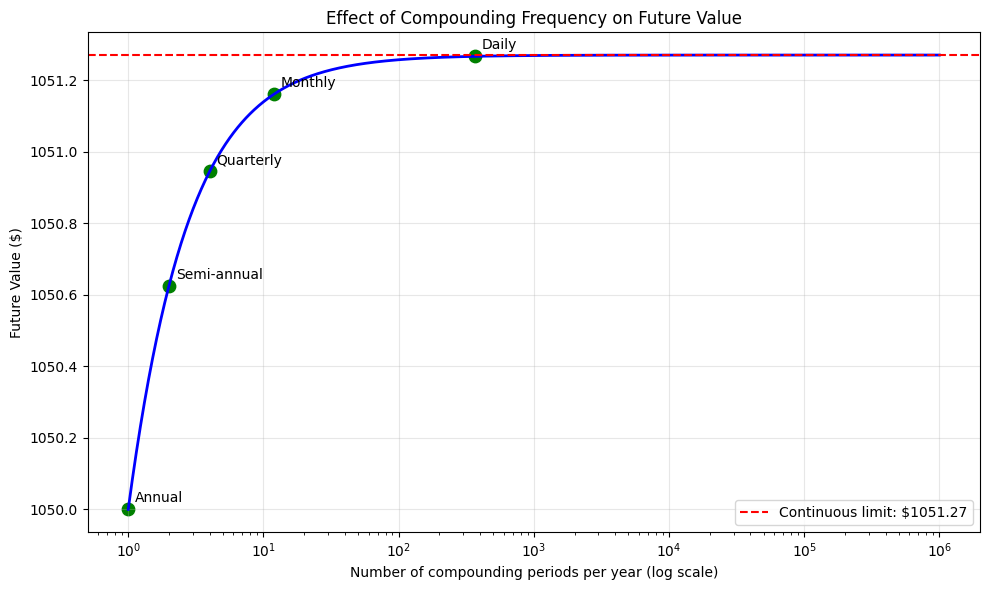

In [2]:
# Create a range of compounding frequencies for plotting
n_values = np.logspace(0, 6, 1000)  # From 1 to 1 million periods per year
fv_values = [principal * (1 + r_annual/n)**(n*time) for n in n_values]
fv_continuous = principal * math.exp(r_annual * time)

plt.figure(figsize=(10, 6))
plt.semilogx(n_values, fv_values, 'b-', linewidth=2)
plt.axhline(y=fv_continuous, color='r', linestyle='--', 
           label=f'Continuous limit: ${fv_continuous:.2f}')

# Mark specific frequencies
specific_n = [1, 2, 4, 12, 365]
specific_labels = ['Annual', 'Semi-annual', 'Quarterly', 'Monthly', 'Daily']
specific_fv = [principal * (1 + r_annual/n)**(n*time) for n in specific_n]
plt.scatter(specific_n, specific_fv, color='green', s=80)

for i, (n, fv, label) in enumerate(zip(specific_n, specific_fv, specific_labels)):
    plt.annotate(label, (n, fv), xytext=(5, 5), textcoords='offset points')

plt.xlabel('Number of compounding periods per year (log scale)')
plt.ylabel('Future Value ($)')
plt.title('Effect of Compounding Frequency on Future Value')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

### Converting Between Compounding Frequencies

To compare rates with different compounding frequencies, we use the **effective annual rate (EAR)**:

For discrete compounding: $EAR = \left(1 + \frac{r}{n}\right)^n - 1$

For continuous compounding: $EAR = e^r - 1$

In [3]:
# Conversion functions
def discrete_to_effective_annual(rate, n_periods):
    return (1 + rate/n_periods)**n_periods - 1

def continuous_to_effective_annual(rate):
    return math.exp(rate) - 1

def annual_to_continuous(annual_rate):
    return math.log(1 + annual_rate)

# Example: Convert 5% annual rate to continuous
annual_rate = 0.05
continuous_rate = annual_to_continuous(annual_rate)

print(f"5% annual rate = {continuous_rate:.6f} ({continuous_rate*100:.4f}%) continuously compounded")

# Verify by checking effective annual rates
ear_from_annual = discrete_to_effective_annual(annual_rate, 1)
ear_from_continuous = continuous_to_effective_annual(continuous_rate)

print(f"EAR from annual: {ear_from_annual:.6f} ({ear_from_annual*100:.4f}%)")
print(f"EAR from continuous: {ear_from_continuous:.6f} ({ear_from_continuous*100:.4f}%)")

5% annual rate = 0.048790 (4.8790%) continuously compounded
EAR from annual: 0.050000 (5.0000%)
EAR from continuous: 0.050000 (5.0000%)


### Connection to Continuous Compounding

Continuous compounding represents the mathematical limit of discrete compounding as the number of periods approaches infinity:

$$\lim_{n \to \infty} \left(1 + \frac{r}{n}\right)^n = e^r$$

This is why continuously compounded interest takes the form $FV = PV \cdot e^{rt}$.

### Key Properties of Continuously Compounded Rates

1. **Time additivity**: For a continuously compounded rate $r$ applied over time $t$, the future value factor is $e^{rt}$. If we need to apply different rates $r_1$ and $r_2$ over time periods $t_1$ and $t_2$, we get:
   $e^{r_1 t_1} \cdot e^{r_2 t_2} = e^{r_1 t_1 + r_2 t_2}$

2. **Time-weighted averaging**: A continuously compounded rate for a combined period is the time-weighted average of the individual rates:
   $r_{combined} = \frac{r_1 t_1 + r_2 t_2}{t_1 + t_2}$

3. **Exponential interpolation**: When interpolating discount factors or future value factors between known points, assuming a constant continuously compounded rate leads to exponential interpolation.